In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import random
import cv2
from tensorflow.keras import layers, models
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.8.0'

In [143]:
TRAIN_PATH="D:\IBM Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\train"
FRUIT_TRAIN_CLASS_NAMES=np.array(os.listdir(r"D:\IBM Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\train"))
print("FRUIT_TRAIN_CLASS_NAMES")
FRUIT_TRAIN_CLASS_NAMES

FRUIT_TRAIN_CLASS_NAMES


array(['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy',
       'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot',
       'Peach___healthy'], dtype='<U35')

In [144]:
TEST_PATH="D:\IBM Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\test"
FRUIT_TEST_CLASS_NAMES=np.array(os.listdir(r"D:\IBM Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\test"))
print("FRUIT_TEST_CLASS_NAMES")
FRUIT_TEST_CLASS_NAMES

FRUIT_TEST_CLASS_NAMES


array(['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy',
       'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot',
       'Peach___healthy'], dtype='<U35')

In [145]:
files_train_count = []
for i,f in enumerate(FRUIT_TRAIN_CLASS_NAMES):
    #print(i,f)
    folder_path = os.path.join(r"D:\IBM Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\train", str(f))
    for path in os.listdir(os.path.join(folder_path)):
        files_train_count.append(['{}/{}'.format(folder_path,path), f, i])
fruits_train_df = pd.DataFrame(files_train_count, columns=['filepath', 'class_name', 'label'])
print("FRUIT TRAIN")
fruits_train_df.head()

FRUIT TRAIN


,filepath,class_name,label
0,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
1,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
2,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
3,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
4,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0


In [146]:
files_test_count = []
for i,f in enumerate(FRUIT_TEST_CLASS_NAMES):
    #print(i,f)
    folder_path = os.path.join(r"D:\IBM Project\Dataset Plant Disease\fruit-dataset\fruit-dataset\test", str(f))
    for path in os.listdir(os.path.join(folder_path)):
        files_test_count.append(['{}/{}'.format(folder_path,path), f, i])
fruits_test_df = pd.DataFrame(files_test_count, columns=['filepath', 'class_name', 'label'])
print("FRUIT TEST")
fruits_test_df.head()

FRUIT TEST


,filepath,class_name,label
0,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
1,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
2,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
3,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0
4,D:\IBM Project\Dataset Plant Disease\fruit-dat...,Apple___Black_rot,0


In [147]:
#fruits train class count
fruits_train_df.class_name.value_counts()

Peach___Bacterial_spot                 1804
Apple___healthy                        1200
Corn_(maize)___healthy                  861
Corn_(maize)___Northern_Leaf_Blight     768
Apple___Black_rot                       440
Peach___healthy                         311
Name: class_name, dtype: int64

In [148]:
#fruits test class count
fruits_test_df.class_name.value_counts()

Peach___Bacterial_spot                 493
Apple___healthy                        445
Corn_(maize)___healthy                 301
Corn_(maize)___Northern_Leaf_Blight    217
Apple___Black_rot                      181
Peach___healthy                         49
Name: class_name, dtype: int64

In [149]:
#fruits train
quantidade_por_class = 310
fruits_train_df = pd.concat([fruits_train_df[fruits_train_df['class_name']== i][:quantidade_por_class] for i in FRUIT_TRAIN_CLASS_NAMES])

In [150]:
#fruits test
quantidade_por_class = 310
fruits_test_df = pd.concat([fruits_test_df[fruits_test_df['class_name']== i][:quantidade_por_class] for i in FRUIT_TEST_CLASS_NAMES])

In [151]:
#fruits train
fruits_train_df.class_name.value_counts()

Corn_(maize)___healthy                 310
Peach___healthy                        310
Apple___Black_rot                      310
Apple___healthy                        310
Peach___Bacterial_spot                 310
Corn_(maize)___Northern_Leaf_Blight    310
Name: class_name, dtype: int64

In [152]:
#fruits test
fruits_test_df.class_name.value_counts()

Apple___healthy                        310
Peach___Bacterial_spot                 310
Corn_(maize)___healthy                 301
Corn_(maize)___Northern_Leaf_Blight    217
Apple___Black_rot                      181
Peach___healthy                         49
Name: class_name, dtype: int64

FRUIT TRAIN IMAGE


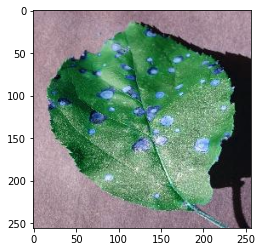

In [153]:
#fruits train
print("FRUIT TRAIN IMAGE")
train_image = cv2.imread(fruits_train_df.filepath[100])
imgplot = plt.imshow(train_image)
plt.show()

FRUIT TEST IMAGE


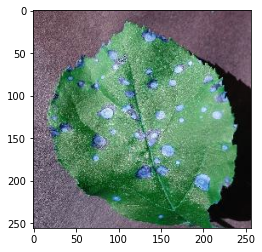

In [154]:
#fruits test
print("FRUIT TEST IMAGE")
test_image = cv2.imread(fruits_test_df.filepath[104])
imgplot = plt.imshow(test_image)
plt.show()

In [155]:
x_train = fruits_train_df['filepath']
y_train = fruits_train_df['label']

In [156]:
x_train_tensor = tf.convert_to_tensor(x_train.values, dtype=tf.string)
y_train_tensor = tf.convert_to_tensor(y_train.values)

In [157]:
x_test = fruits_test_df['filepath']
y_test = fruits_test_df['label']

In [158]:
x_test_tensor = tf.convert_to_tensor(x_test.values, dtype=tf.string)
y_test_tensor = tf.convert_to_tensor(y_test.values)

In [159]:
train_data = tf.data.Dataset.from_tensor_slices((x_train_tensor, y_train_tensor))
test_data = tf.data.Dataset.from_tensor_slices((x_test_tensor, y_test_tensor))

In [160]:
def map_fn(path, label):
    image = tf.image.decode_jpeg(tf.io.read_file(path))
    return image, label
#apply the function
train_data_img = train_data.map(map_fn)
test_data_img = test_data.map(map_fn)

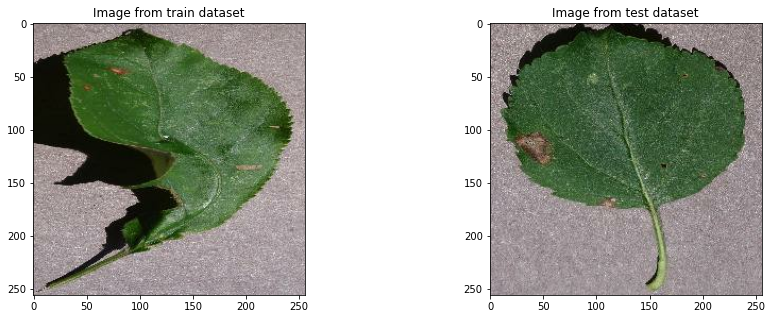

In [161]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
for i,l in train_data_img.take(1):
    ax[0].set_title('Image from train dataset');
    ax[0].imshow(i);
for i,l in test_data_img.take(1):
    ax[1].set_title('Image from test dataset');
    ax[1].imshow(i);

Text(0, 0.5, 'Frequency')

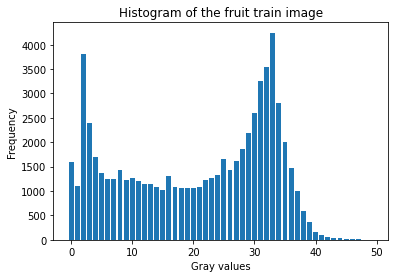

In [162]:
hist = cv2.calcHist([train_image],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the fruit train image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

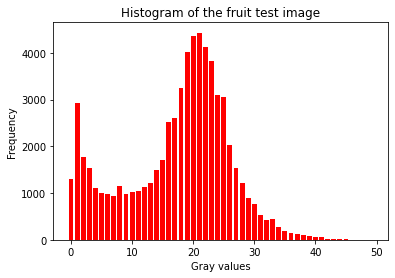

In [163]:
hist = cv2.calcHist([test_image],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel(), color='Red')
plt.title('Histogram of the fruit test image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

In [164]:
print("Train image size = ",train_image.shape)
print("Test image size = ",test_image.shape)

Train image size =  (256, 256, 3)
Test image size =  (256, 256, 3)
